In [1]:
# Author: Jaehun Kim
# Email: rlawogns1204@unist.ac.kr
# Affiliation: UNIST BME BCILAB
# Date: 2023-06-12
#
# This code implements a tactile information processing model using a spiking
# neural network (SNN). It simulates the processing of tactile information from
# mechanoreceptors in the skin through primary afferent fibers (PA), cuneate nucleus
# neurons (PN and IN), and ultimately, somatosensory cortex neurons. The model
# incorporates lateral inhibition and various receptive field properties to
# represent a realistic processing of touch stimuli.

# with DIGIT-sensor
# pip install torch==1.8.1+cu101 torchvision==0.9.1+cu101 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import scipy.io
import time
import numpy as np
from PIL import Image
import io
import datetime
import cv2
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

from Function.snn_IZHIlayers import *
from Function.snn_plot import *
from Function.snn_simulation import *
from Function.snn_stimulation import *
from Function.snn_receptive_field_weights import *

from line_profiler import LineProfiler

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Check if GPU is available and print the CUDA version
print(f"GPU available: {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
# Enable GPU support if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Set the device to 'cpu'
device = 'cpu'
print(f"Using device: {device}")
# Start of the SNN (Spiking Neural Network) code

GPU available: True
CUDA version: 10.1
Using device: cpu


In [3]:
# Set sensor dimensions (height and width in millimeters)
sensor_h, sensor_w = 19, 16
# Set pixel dimensions (number of pixels in height and width)
# pixel_h, pixel_w = 320, 240///
pixel_h, pixel_w = 64,48
# Set image frames per second (FPS) of tactile sensor
image_FPS = 60

In [4]:
R = ReceptiveFieldWeights(pixel_h, pixel_w, device, type_output = 'speed')

speed
torch.Size([88, 3072])
sa_rf shape: torch.Size([88, 3072]) with height = 11 with width = 8
ra_rf shape: torch.Size([130, 3072]) with height = 13 with width = 10
sa_cn_pn_rf shape:  torch.Size([54, 88]) sa_cn_pn_step_height: 9 sa_cn_pn_step_width: 6
sa_cn_in_rf shape:  torch.Size([54, 88]) sa_cn_in_step_height: 9 sa_cn_in_step_width: 6
ra_cn_pn_rf shape:  torch.Size([88, 130]) ra_cn_pn_step_height: 11 ra_cn_pn_step_width: 8
ra_cn_in_rf shape:  torch.Size([88, 130]) ra_cn_in_step_height: 11 ra_cn_in_step_width: 8
sa_intopn_rf shape:  torch.Size([54, 54])
ra_intopn_rf shape:  torch.Size([88, 88])
cn_pn_sa_rf shape:  torch.Size([28, 54]) cn_pn_sa_rf_step_height: 7 cn_pn_sa_rf_step_width: 4
cn_in_sa_rf shape:  torch.Size([28, 54]) cn_in_sa_rf_step_height: 7 cn_in_sa_rf_step_width: 4
cn_pn_ra_rf shape:  torch.Size([28, 88]) cn_pn_ra_rf_step_height: 7 cn_pn_ra_rf_step_width: 4
cn_in_ra_rf shape:  torch.Size([28, 88]) cn_in_ra_rf_step_height: 7 cn_in_ra_rf_step_width: 4
cn_intopn_rf shap

0
Current y position in mm: 0.0


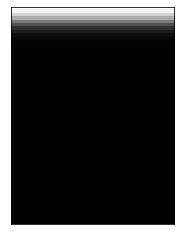

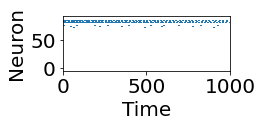

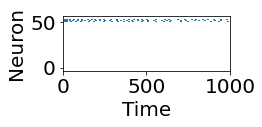

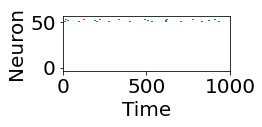

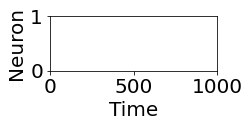

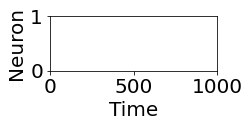

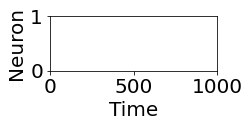

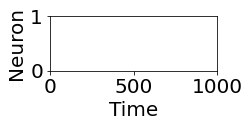

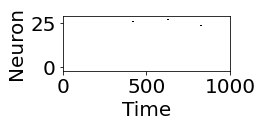

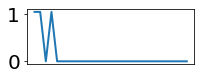

1
Current y position in mm: 0.999


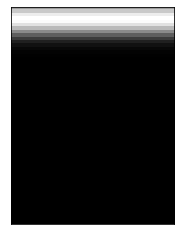

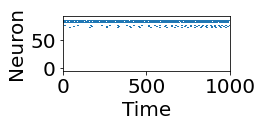

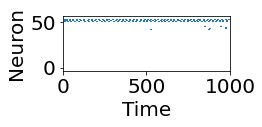

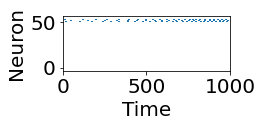

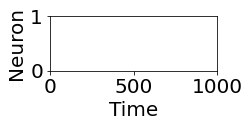

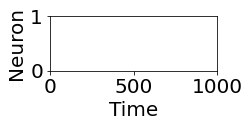

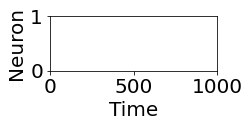

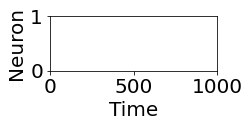

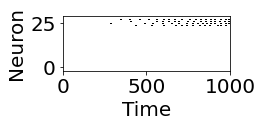

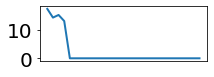

2
Current y position in mm: 1.998


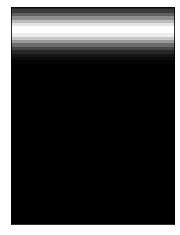

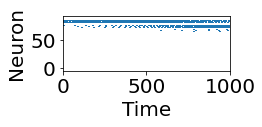

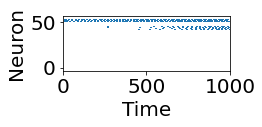

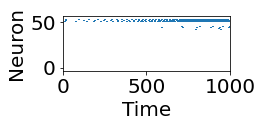

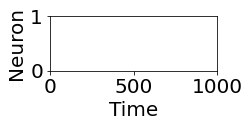

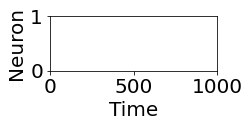

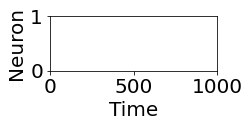

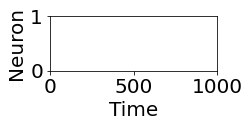

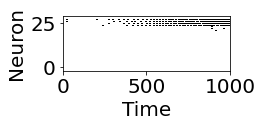

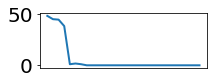

3
Current y position in mm: 2.997


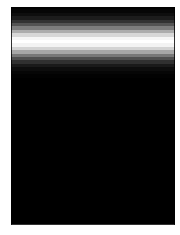

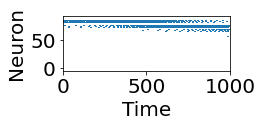

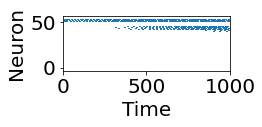

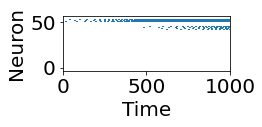

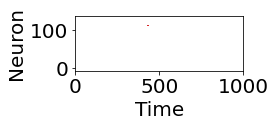

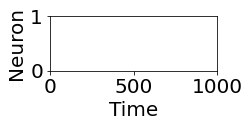

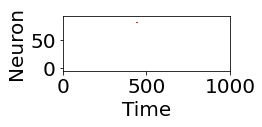

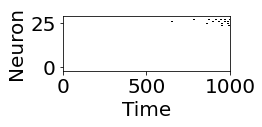

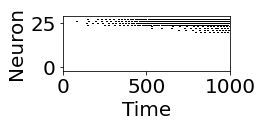

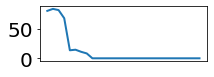

4
Current y position in mm: 3.996


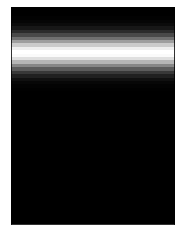

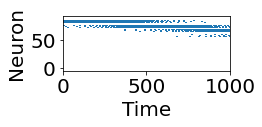

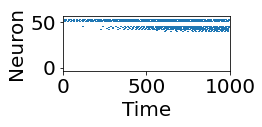

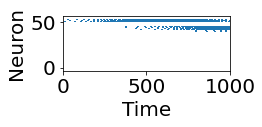

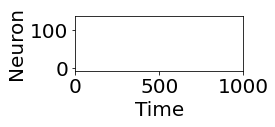

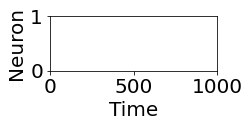

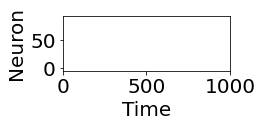

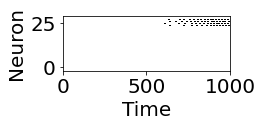

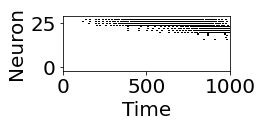

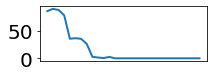

5
Current y position in mm: 4.995


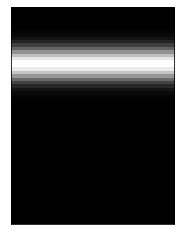

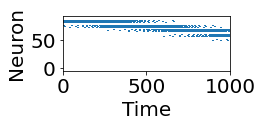

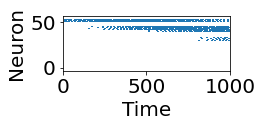

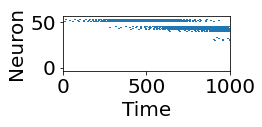

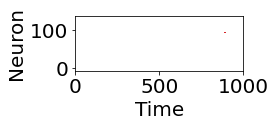

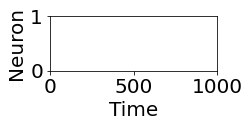

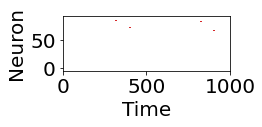

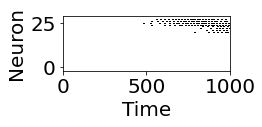

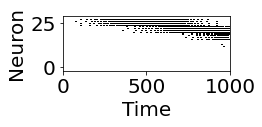

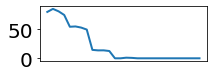

6
Current y position in mm: 5.994


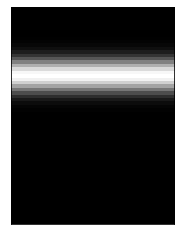

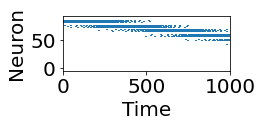

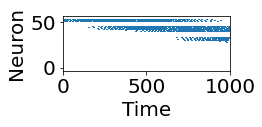

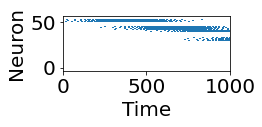

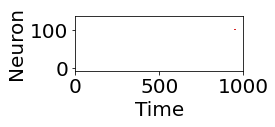

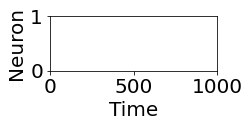

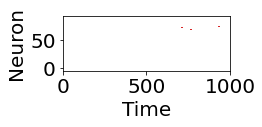

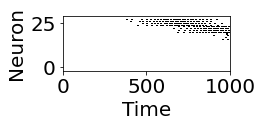

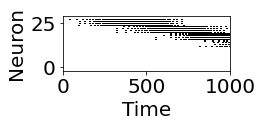

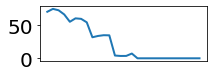

7
Current y position in mm: 6.993


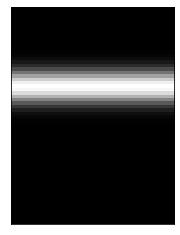

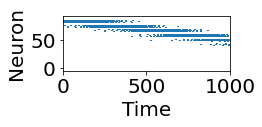

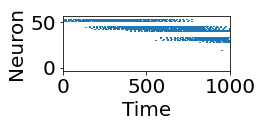

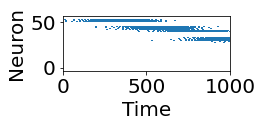

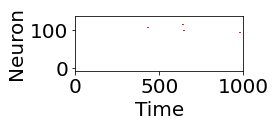

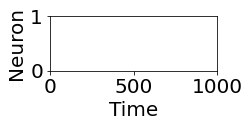

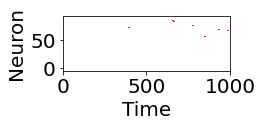

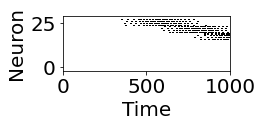

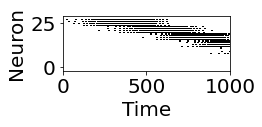

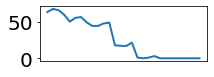

8
Current y position in mm: 7.992


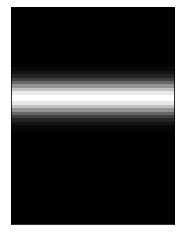

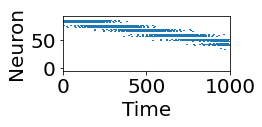

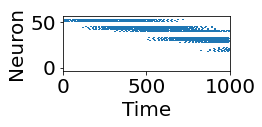

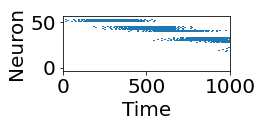

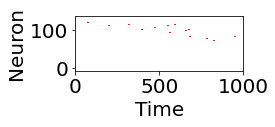

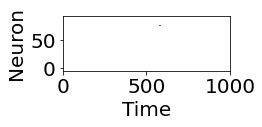

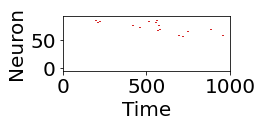

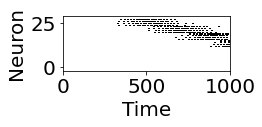

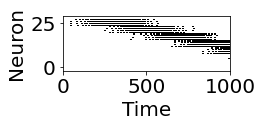

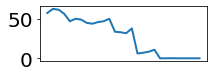

9
Current y position in mm: 8.991


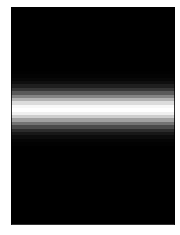

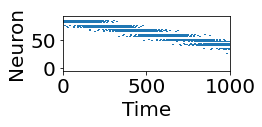

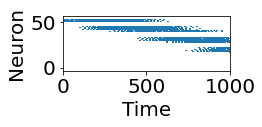

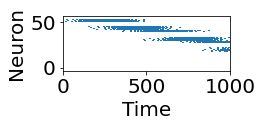

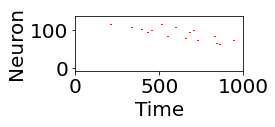

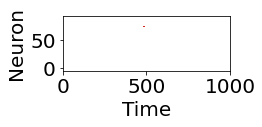

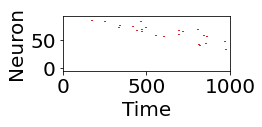

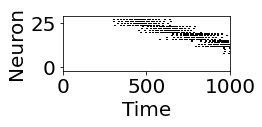

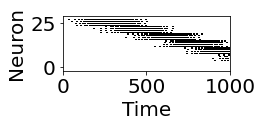

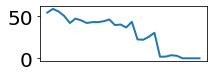

10
Current y position in mm: 9.99


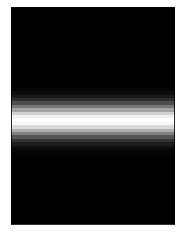

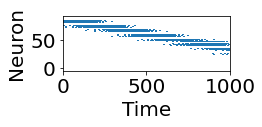

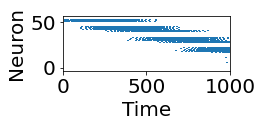

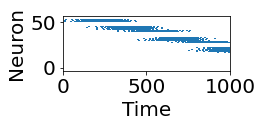

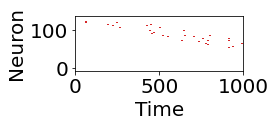

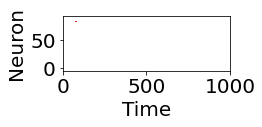

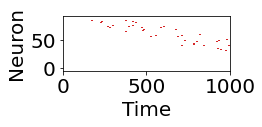

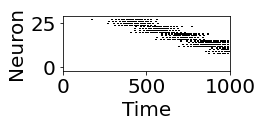

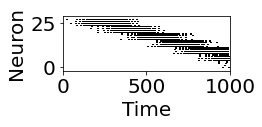

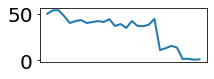

11
Current y position in mm: 10.988999999999999


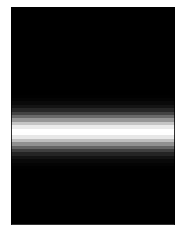

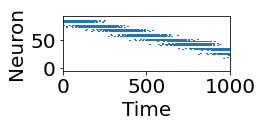

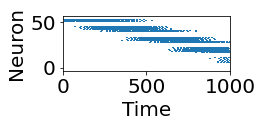

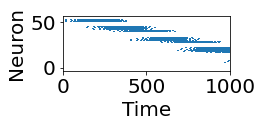

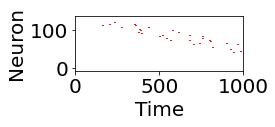

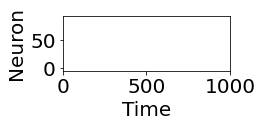

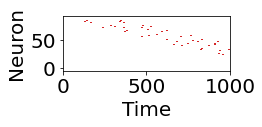

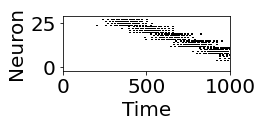

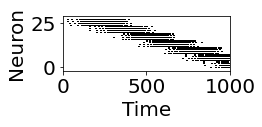

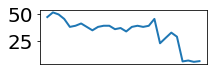

12
Current y position in mm: 11.988


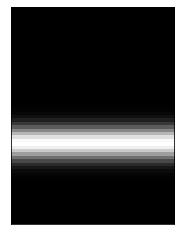

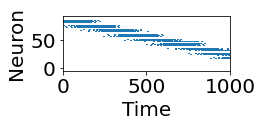

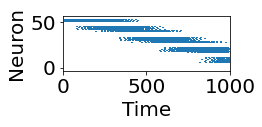

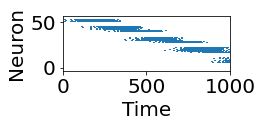

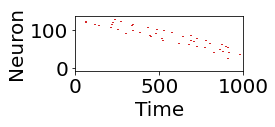

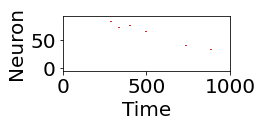

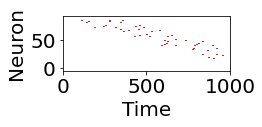

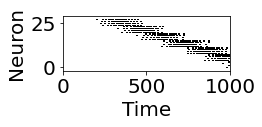

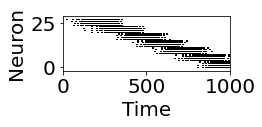

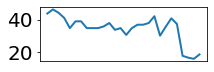

13
Current y position in mm: 12.987


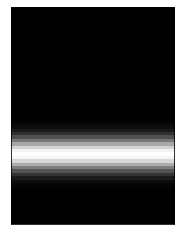

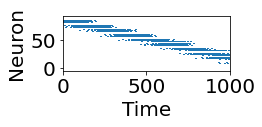

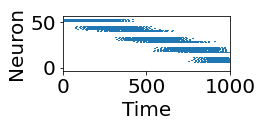

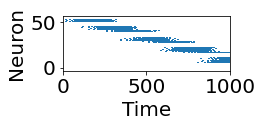

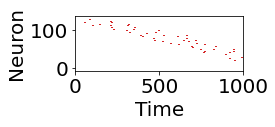

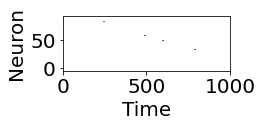

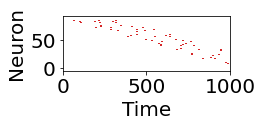

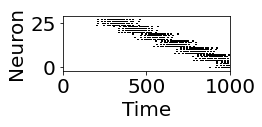

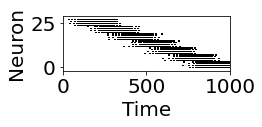

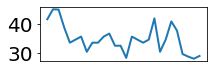

14
Current y position in mm: 13.986


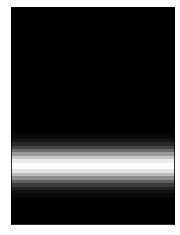

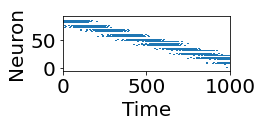

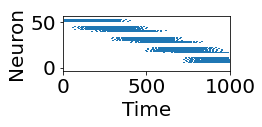

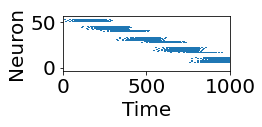

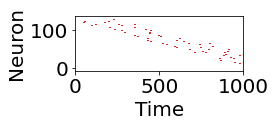

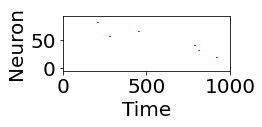

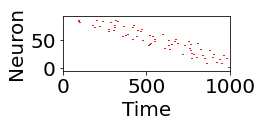

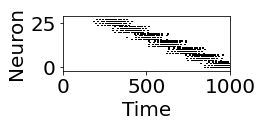

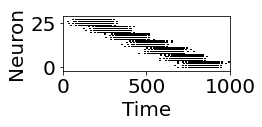

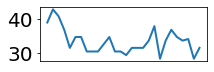

15
Current y position in mm: 14.985


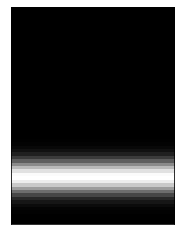

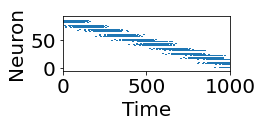

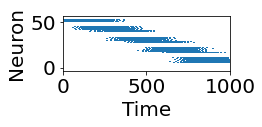

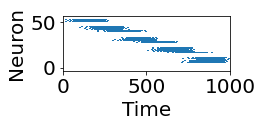

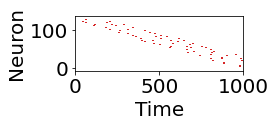

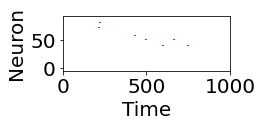

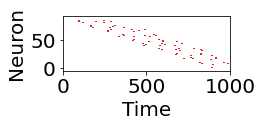

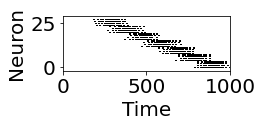

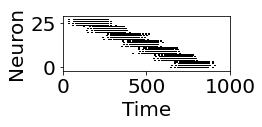

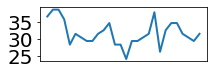

16
Current y position in mm: 15.984


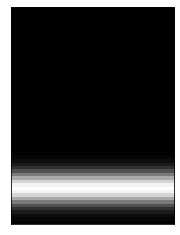

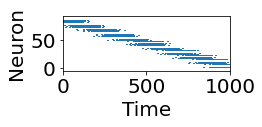

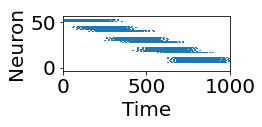

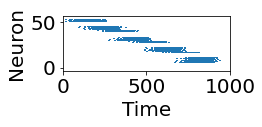

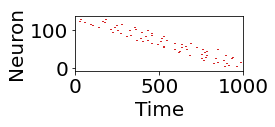

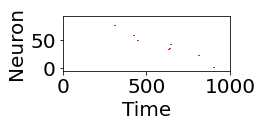

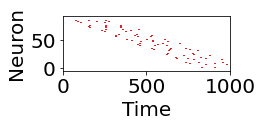

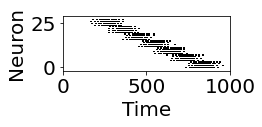

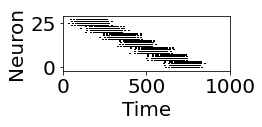

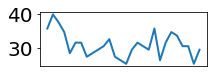

17
Current y position in mm: 16.983


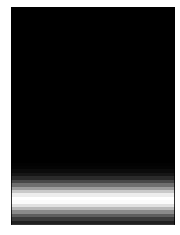

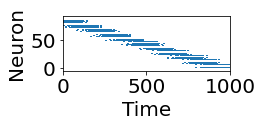

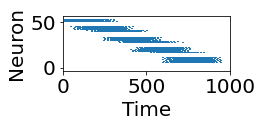

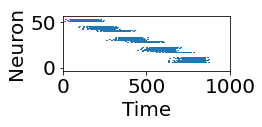

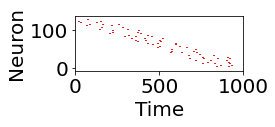

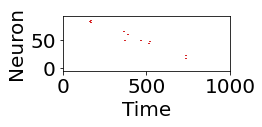

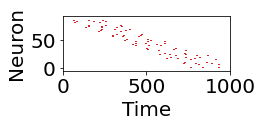

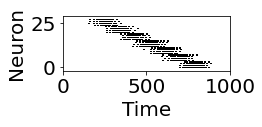

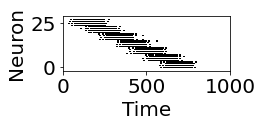

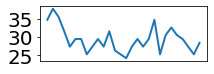

18
Current y position in mm: 17.982


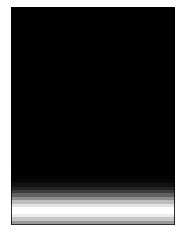

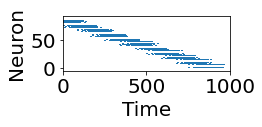

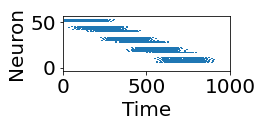

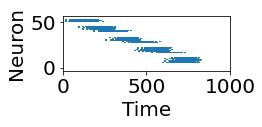

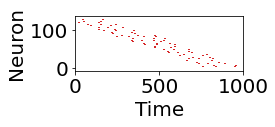

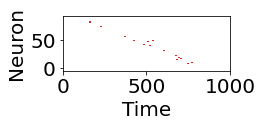

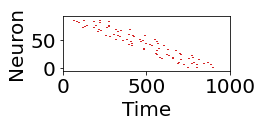

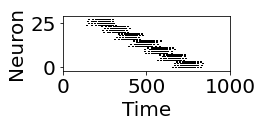

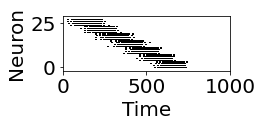

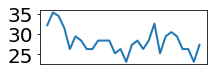

In [8]:
num_speeds = 19
num_stim = 1000
F = 30
pixel_h = 64
pixel_w = 48
device = 'cpu'  # Or your device of choice
data = []
labels = []

    # Generate the stimuli for each angle from 0 to 180 degrees
for speed in range(num_speeds):
# for speed in [18]:
    print(speed)
    # Generate the stimulus
    stimulus =  generate_speed_bar_stimuli(speed = speed, show_frames = [999])
    
    S = SNN(R, device = device, noise_std_val = 2)
    S.feedforward(stimulus)
    mean_firing_rates = plot_SNN(S,layers = ['sa','ra','cn'],plot_figure = True)



In [11]:
num_trials = 20
start_speed = 10
num_speeds = 20
num_stim = 1000
F = 10
pixel_h = 64
pixel_w = 48
device = 'cpu'  # Or your device of choice
data = []
labels = []

# Run the trials
for trial in range(num_trials):
    print("trial :", trial)
    # Generate the stimuli for each speed from 10 to 19
    for speed in range(start_speed, start_speed + num_speeds):
        print("trial :", trial, ", Speed: ",speed)
        # Generate the stimulus
        stimulus =  generate_speed_bar_stimuli(speed = speed, show_frames = [])
        
        S = SNN(R, device = device, noise_std_val = 4)
        S.feedforward(stimulus)
        mean_firing_rates = plot_SNN(S,plot_figure = False)

        # Save the data and labels
        data.append(mean_firing_rates.cpu().numpy())
        labels.append(speed)

print(labels)

trial : 0
trial : 0 , Speed:  10
trial : 0 , Speed:  11
trial : 0 , Speed:  12
trial : 0 , Speed:  13
trial : 0 , Speed:  14
trial : 0 , Speed:  15
trial : 0 , Speed:  16
trial : 0 , Speed:  17
trial : 0 , Speed:  18
trial : 0 , Speed:  19
trial : 0 , Speed:  20
trial : 0 , Speed:  21
trial : 0 , Speed:  22
trial : 0 , Speed:  23
trial : 0 , Speed:  24
trial : 0 , Speed:  25
trial : 0 , Speed:  26
trial : 0 , Speed:  27
trial : 0 , Speed:  28
trial : 0 , Speed:  29
trial : 1
trial : 1 , Speed:  10
trial : 1 , Speed:  11
trial : 1 , Speed:  12
trial : 1 , Speed:  13
trial : 1 , Speed:  14
trial : 1 , Speed:  15
trial : 1 , Speed:  16
trial : 1 , Speed:  17
trial : 1 , Speed:  18
trial : 1 , Speed:  19
trial : 1 , Speed:  20
trial : 1 , Speed:  21
trial : 1 , Speed:  22
trial : 1 , Speed:  23
trial : 1 , Speed:  24
trial : 1 , Speed:  25
trial : 1 , Speed:  26
trial : 1 , Speed:  27
trial : 1 , Speed:  28
trial : 1 , Speed:  29
trial : 2
trial : 2 , Speed:  10
trial : 2 , Speed:  11
tria

In [12]:
# Convert data and labels to numpy arrays

data = np.array(data)
labels = np.array(labels)

# np.save('data_svm_speed.npy', data)
# np.save('labels_svm_speed.npy', labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Create and train the SVM
clf = svm.SVC(kernel='linear')  # You can change the kernel as needed
clf.fit(X_train, y_train)

# Test the SVM
y_pred = clf.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# print(X_train.shape)
# print(X_test.shape)
# print(y_train)
# print(y_test)

# Identify the misclassified samples
misclassified = np.where(y_test != y_pred)

# Print the misclassified labels
print("Misclassified labels: ", y_test[misclassified])

# Print the indices of the misclassified samples
print("Misclassified labels: ", y_test[misclassified])
print("Test output of misclassified labels: ", y_pred[misclassified])

Accuracy: 0.5625
Misclassified labels:  [19 23 20 23 24 16 26 22 28 21 15 27 25 21 26 24 23 27 22 26 23 28 25 18
 23 28 20 24 20 22 25 28 21 26 19]
Misclassified labels:  [19 23 20 23 24 16 26 22 28 21 15 27 25 21 26 24 23 27 22 26 23 28 25 18
 23 28 20 24 20 22 25 28 21 26 19]
Test output of misclassified labels:  [20 24 19 22 23 17 27 23 24 22 16 29 24 20 24 26 25 28 21 28 21 29 27 17
 22 29 19 23 21 23 24 29 19 25 20]
